In [1]:
import pandas as pd
import numpy as np
import re
import string

# R. Tatman's Question-Answering Dataset

In [2]:
def sentence_cleanup(string):
    string = re.sub('-LRB-', '(', string)
    string = re.sub('-RRB-', ')', string)
    string = re.sub('\s$', '', string)
    string = re.sub(' {2,}', ' ', string)
    string = re.sub(r'(?<!\s)([!"#$%&\'()*+,\/:;<=>?@\[\\\]\^_`{|}~])', r' \1', string)
    string = re.sub(r'(?<=\d) ([:.])', r'\1', string)
    string = re.sub(r'(?<=\b\w) \.', r'\.', string)
    string = re.sub(r'\((?!\s)', r'( ', string)
    string = re.sub(r'(?<=\d) ,(?=\d)', r',', string)
    string = re.sub('` `', '``', string)
    string = re.sub("' '", "''", string)
    string = re.sub(' "(?!\s)', ' `` ', string)
    string = re.sub('"', "''", string)
    string = re.sub(r' \([^\w]+\)', r'', string)
    string = string.lower()
    return string

def valid(string):
    return string[-1]=='?'

In [3]:
def new_dataset(source, sep='\t'):
    ds = pd.read_csv(source, sep=sep, encoding='utf8')
    ds = ds[(~ds.Question.isna()) & (~ds.Answer.isna())]
    
    questions = list(ds.Question)
    new_questions = list(map(sentence_cleanup, questions))
    ds.Question = new_questions
    
    answers = list(ds.Answer)
    new_answers = list(map(sentence_cleanup, answers))
    ds.Answer = new_answers
    
    ds = ds[valid(ds.Question.str)]
    return ds

In [4]:
s8 = new_dataset('data/tatman/s08.txt')
s9 = new_dataset('data/tatman/s09.txt')
s10 = new_dataset('data/tatman/s10.txt')

In [5]:
ds = pd.concat([s8, s9, s10])
ds.to_csv('data/tatman/merged.tsv', sep='\t', index=None)

In [6]:
replace = {'too easy': 0, 'easy': 1, 'medium': 2, 'hard': 3, 'too hard': 4}

In [7]:
ds

,ArticleTitle,Question,Answer,DifficultyFromQuestioner,DifficultyFromAnswerer,ArticleFile
0,Abraham_Lincoln,was abraham lincoln the sixteenth president of...,yes,easy,easy,S08_set3_a4
1,Abraham_Lincoln,was abraham lincoln the sixteenth president of...,yes.,easy,easy,S08_set3_a4
2,Abraham_Lincoln,did lincoln sign the national banking act of 1...,yes,easy,medium,S08_set3_a4
3,Abraham_Lincoln,did lincoln sign the national banking act of 1...,yes.,easy,easy,S08_set3_a4
4,Abraham_Lincoln,did his mother die of pneumonia ?,no,easy,medium,S08_set3_a4
...,...,...,...,...,...,...
1452,Zebra,what areas do the grevy 's zebras inhabit ?,semi-arid grasslands of ethiopia and northern ...,hard,hard,S10_set1_a9
1454,Zebra,which species of zebra is known as the common ...,"plains zebra ( equus quagga , formerly equus b...",hard,medium,S10_set1_a9
1455,Zebra,which species of zebra is known as the common ...,plains zebra,hard,medium,S10_set1_a9
1456,Zebra,at what age can a zebra breed ?,five or six,hard,medium,S10_set1_a9


<Axes: >

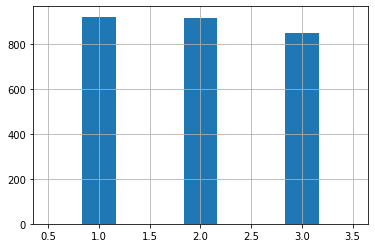

In [8]:
ds.DifficultyFromQuestioner.replace(replace).hist(range=(0.5, 3.5), bins=9)

<Axes: >

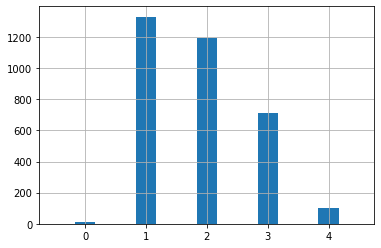

In [9]:
ds.DifficultyFromAnswerer.replace(replace).hist(range=(-0.5, 4.5), bins=15)

# Exam Question Dataset

In [18]:
bloom = pd.read_csv('data/bloom/combined_dataset.txt', header=None)

In [19]:
bloom_transform = list(map(sentence_cleanup, list(bloom[0])))

In [20]:
bloom2 = pd.read_csv('data/bloom/combined_dataset_questions.txt', header=None)

,0
0,Comprehension
1,Comprehension
2,Comprehension
3,Comprehension
4,Comprehension
...,...
2517,Application
2518,Knowledge
2519,Analysis
2520,Evaluation


In [24]:
zipped = pd.DataFrame(list(zip(bloom_transform, bloom2[0])), columns=['question', 'level'])

In [26]:
zipped.to_csv('data/bloom/transformed.csv', sep=';', index=None)

# Stanford Question Answering Dataset

In [37]:
def bracket_cleanup(string):
    string = re.sub('-lrb-', '(', string)
    string = re.sub('-rrb-', ')', string)
    return string

In [38]:
with open('data/squad/train/train.txt.target.txt', 'r', encoding='utf-8') as file:
    target_1 = file.read().splitlines()
with open('data/squad/dev/dev.txt.shuffle.dev.target.txt', 'r', encoding='utf-8') as file:
    target_2 = file.read().splitlines()
with open('data/squad/test/dev.txt.shuffle.test.target.txt', 'r', encoding='utf-8') as file:
    target_3 = file.read().splitlines()
target = target_1+target_2+target_3
target = list(map(bracket_cleanup, target))

In [39]:
with open('data/squad/train/train.txt.source.txt', 'r', encoding='utf-8') as file:
    source_1 = file.read().splitlines()
with open('data/squad/dev/dev.txt.shuffle.dev.source.txt', 'r', encoding='utf-8') as file:
    source_2 = file.read().splitlines()
with open('data/squad/test/dev.txt.shuffle.test.source.txt', 'r', encoding='utf-8') as file:
    source_3 = file.read().splitlines()
source = source_1+source_2+source_3
source = list(map(bracket_cleanup, source))

In [40]:
squad = pd.DataFrame(list(zip(target, source)), columns=['question', 'answer'])
squad

,question,answer
0,to whom did the virgin mary allegedly appear i...,"it is a replica of the grotto at lourdes , fra..."
1,what is in front of the notre dame main buildi...,immediately in front of the main building and ...
2,the basilica of the sacred heart at notre dame...,next to the main building is the basilica of t...
3,what is the grotto at notre dame ?,immediately behind the basilica is the grotto ...
4,what sits on top of the main building at notre...,atop the main building 's gold dome is a golde...
...,...,...
104559,what paved the way for the augsburg confession ?,"despite the disagreements on the eucharist , t..."
104560,how many fraternities are apart of the univers...,there are fifteen fraternities and seven soror...
104561,in what year was the trial of rev. jimmy creech ?,rev. jimmy creech was defrocked after a highly...
104562,what town was actually granted to the huguenot...,"when they arrived , colonial authorities offer..."


In [41]:
squad.to_csv('data/squad/squad.csv', sep=';', index=None)

# Question-Answer Jokes

In [46]:
jokes = new_dataset('data/jokes/jokes.csv', sep=',')

In [53]:
jq = list(jokes.Question)
ja = list(jokes.Answer)

In [50]:
def trim_q(sentence):
    if sentence[:4] == 'q : ':
        return sentence[4:]
    return sentence

In [51]:
def trim_a(sentence):
    if sentence[:4] == 'a : ':
        return sentence[4:]
    return sentence

In [58]:
jokes.Question = list(map(trim_q, jq))
jokes.Answer = list(map(trim_a, ja))

In [59]:
jokes[['Question', 'Answer']].to_csv('data/jokes/jokes_clean.csv', sep=';', index=None)